In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('C:/Users/sjkan/Desktop/연세/YBIGTA/22 여름방학/신입기수프로젝트')

# 데이터 불러오기

In [2]:
data = pd.read_csv('rawdata.csv')
data

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276332,2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276333,2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276334,2022-07-18 23:40,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.isnull().sum()

날짜              0
현재수위          743
유입량           743
저수량           743
공용량           743
방류량           743
강화대교_조위      4927
청담대교_유량     16380
잠수교_유량     196849
한강대교_유량      1279
행주대교_유량        59
대곡교_강수량         0
진관교_강수량         0
송정동_강수량         0
청담대교_수위        59
잠수교_수위         59
한강대교_수위        59
행주대교_수위        59
dtype: int64

# 청담대교 조위 결측치 처리
###### 변수 이름은 그대로 gangwha...

In [4]:
gangwha = data[['날짜', '청담대교_유량']]
gangwha

,날짜,청담대교_유량
0,2012-05-01 00:00,469.05
1,2012-05-01 00:10,498.00
2,2012-05-01 00:20,490.68
3,2012-05-01 00:30,476.21
4,2012-05-01 00:40,476.21
...,...,...
276331,2022-07-18 23:10,319.84
276332,2022-07-18 23:20,314.01
276333,2022-07-18 23:30,387.55
276334,2022-07-18 23:40,454.91


In [5]:
gangwha.날짜 = pd.to_datetime(gangwha.날짜)
gangwha

C:\Users\sjkan\AppData\Local\Temp\ipykernel_5320\4062866498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangwha.날짜 = pd.to_datetime(gangwha.날짜)


,날짜,청담대교_유량
0,2012-05-01 00:00:00,469.05
1,2012-05-01 00:10:00,498.00
2,2012-05-01 00:20:00,490.68
3,2012-05-01 00:30:00,476.21
4,2012-05-01 00:40:00,476.21
...,...,...
276331,2022-07-18 23:10:00,319.84
276332,2022-07-18 23:20:00,314.01
276333,2022-07-18 23:30:00,387.55
276334,2022-07-18 23:40:00,454.91


In [7]:
gangwha[gangwha['청담대교_유량'].isnull()]   # 16380개의 결측치 : 순서대로 채우기

,날짜,청담대교_유량
80994,2015-05-11 11:00:00,NaN
80995,2015-05-11 11:10:00,NaN
80996,2015-05-11 11:20:00,NaN
80997,2015-05-11 11:30:00,NaN
80998,2015-05-11 11:40:00,NaN
...,...,...
273775,2022-07-01 05:10:00,NaN
273776,2022-07-01 05:20:00,NaN
273777,2022-07-01 05:30:00,NaN
273778,2022-07-01 05:40:00,NaN


In [11]:
nan_index = list(gangwha[gangwha['청담대교_유량'].isnull()].index)
nan_index

[80994,
 80995,
 80996,
 80997,
 80998,
 80999,
 81000,
 81001,
 81002,
 81003,
 81004,
 81005,
 81006,
 81007,
 83021,
 83022,
 83134,
 83136,
 83138,
 83139,
 83141,
 83142,
 83143,
 83144,
 83146,
 83147,
 83148,
 83151,
 83152,
 83153,
 83154,
 83156,
 83157,
 83158,
 83159,
 83160,
 83161,
 83162,
 83163,
 83164,
 83165,
 83166,
 83167,
 83168,
 83169,
 83170,
 83171,
 83172,
 83173,
 83174,
 83175,
 83187,
 83203,
 83206,
 83219,
 83228,
 83229,
 83230,
 83231,
 83237,
 83238,
 83239,
 83240,
 83248,
 83249,
 83250,
 83251,
 83252,
 83253,
 83254,
 83255,
 83259,
 83260,
 83261,
 83262,
 83263,
 83264,
 83265,
 83266,
 83267,
 83268,
 83269,
 83270,
 83271,
 83272,
 83273,
 83274,
 83275,
 83276,
 83277,
 83278,
 83279,
 83280,
 83281,
 83282,
 83283,
 83284,
 83285,
 83286,
 83287,
 83288,
 83289,
 83290,
 83291,
 83292,
 83293,
 83294,
 83295,
 83296,
 83297,
 83298,
 83299,
 83300,
 83301,
 83302,
 83303,
 83304,
 83305,
 83306,
 83307,
 83308,
 83309,
 83311,
 83312,
 83313,


In [12]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_sarima.extend(nan_index[-2:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [13]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])
index_interpolate_

[83133,
 83134,
 83135,
 83135,
 83136,
 83137,
 83186,
 83187,
 83188,
 83202,
 83203,
 83204,
 83205,
 83206,
 83207,
 83218,
 83219,
 83220,
 83834,
 83835,
 83836,
 83837,
 83838,
 83839,
 83844,
 83845,
 83846,
 85699,
 85700,
 85701,
 87044,
 87045,
 87046,
 87626,
 87627,
 87628,
 87632,
 87633,
 87634,
 87656,
 87657,
 87658,
 88084,
 88085,
 88086,
 88314,
 88315,
 88316,
 89655,
 89656,
 89657,
 90475,
 90476,
 90477,
 90477,
 90478,
 90479,
 95976,
 95977,
 95978,
 95982,
 95983,
 95984,
 98584,
 98585,
 98586,
 100246,
 100247,
 100248,
 100272,
 100273,
 100274,
 102191,
 102192,
 102193,
 102196,
 102197,
 102198,
 102198,
 102199,
 102200,
 102749,
 102750,
 102751,
 104367,
 104368,
 104369,
 105000,
 105001,
 105002,
 105003,
 105004,
 105005,
 120957,
 120958,
 120959,
 120982,
 120983,
 120984,
 121033,
 121034,
 121035,
 121057,
 121058,
 121059,
 121061,
 121062,
 121063,
 121069,
 121070,
 121071,
 121073,
 121074,
 121075,
 121093,
 121094,
 121095,
 121099,
 121

In [14]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [15]:
# 데이터프레임 분리

gangwha_interpolate = gangwha.copy()
gangwha_interpolate = gangwha_interpolate.set_index('날짜')
gangwha_interpolate = gangwha_interpolate.iloc[index_interpolate_, :]
gangwha_interpolate

,청담대교_유량
날짜,
2015-05-26 07:30:00,243.29
2015-05-26 07:40:00,NaN
2015-05-26 07:50:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 08:00:00,NaN
...,...
2022-06-21 10:10:00,NaN
2022-06-21 10:20:00,243.29
2022-06-21 10:20:00,243.29


In [16]:
# 보간

gangwha_interpolate.interpolate(method='time', inplace=True)
gangwha_interpolate   # 보간 결과 확인

,청담대교_유량
날짜,
2015-05-26 07:30:00,243.29
2015-05-26 07:40:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 07:50:00,243.29
2015-05-26 08:00:00,243.29
...,...
2022-06-21 10:10:00,243.29
2022-06-21 10:20:00,243.29
2022-06-21 10:20:00,243.29


In [17]:
gangwha_interpolate.isnull().sum()

청담대교_유량    0
dtype: int64

In [18]:
gangwha = gangwha.set_index('날짜')
gangwha.loc[gangwha_interpolate.index] = gangwha_interpolate
gangwha.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

청담대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [19]:
#!pip install pmdarima

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [21]:
index_sarima[0]

80994

In [22]:
gangwha

,청담대교_유량
날짜,
2012-05-01 00:00:00,469.05
2012-05-01 00:10:00,498.00
2012-05-01 00:20:00,490.68
2012-05-01 00:30:00,476.21
2012-05-01 00:40:00,476.21
...,...
2022-07-18 23:10:00,319.84
2022-07-18 23:20:00,314.01
2022-07-18 23:30:00,387.55


In [23]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[80994, 80995, 80996, 80997, 80998, 80999, 81000, 81001, 81002, 81003, 81004, 81005, 81006, 81007]
[83021, 83022]
[83138, 83139]
[83141, 83142, 83143, 83144]
[83146, 83147, 83148]
[83151, 83152, 83153, 83154]
[83156, 83157, 83158, 83159, 83160, 83161, 83162, 83163, 83164, 83165, 83166, 83167, 83168, 83169, 83170, 83171, 83172, 83173, 83174, 83175]
[83228, 83229, 83230, 83231]
[83237, 83238, 83239, 83240]
[83248, 83249, 83250, 83251, 83252, 83253, 83254, 83255]
[83259, 83260, 83261, 83262, 83263, 83264, 83265, 83266, 83267, 83268, 83269, 83270, 83271, 83272, 83273, 83274, 83275, 83276, 83277, 83278, 83279, 83280, 83281, 83282, 83283, 83284, 83285, 83286, 83287, 83288, 83289, 83290, 83291, 83292, 83293, 83294, 83295, 83296, 83297, 83298, 83299, 83300, 83301, 83302, 83303, 83304, 83305, 83306, 83307, 83308, 83309]
[83311, 83312, 83313, 83314, 83315, 83316, 83317, 83318, 83319, 83320, 83321, 83322, 83323, 83324, 83325, 83326, 83327, 83328, 83329, 83330, 83331, 83332, 83333, 83334, 83335, 8

In [27]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [28]:
len(total) #결측치 처리해야 하는 구간의 수

586

In [27]:
# 전체 다 조위 cycle(28일, 즉 직전 144*28=4032개의 row)을 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(gangwha[start-60:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))
  print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

1번째 구간 결측치 처리 완료
2번째 구간 결측치 처리 완료
3번째 구간 결측치 처리 완료
4번째 구간 결측치 처리 완료
5번째 구간 결측치 처리 완료
6번째 구간 결측치 처리 완료
7번째 구간 결측치 처리 완료
8번째 구간 결측치 처리 완료
9번째 구간 결측치 처리 완료
10번째 구간 결측치 처리 완료
11번째 구간 결측치 처리 완료
12번째 구간 결측치 처리 완료
13번째 구간 결측치 처리 완료
14번째 구간 결측치 처리 완료
15번째 구간 결측치 처리 완료
16번째 구간 결측치 처리 완료
17번째 구간 결측치 처리 완료
18번째 구간 결측치 처리 완료
19번째 구간 결측치 처리 완료
20번째 구간 결측치 처리 완료
21번째 구간 결측치 처리 완료
22번째 구간 결측치 처리 완료
23번째 구간 결측치 처리 완료
24번째 구간 결측치 처리 완료
25번째 구간 결측치 처리 완료
26번째 구간 결측치 처리 완료
27번째 구간 결측치 처리 완료
28번째 구간 결측치 처리 완료
29번째 구간 결측치 처리 완료
30번째 구간 결측치 처리 완료
31번째 구간 결측치 처리 완료
32번째 구간 결측치 처리 완료
33번째 구간 결측치 처리 완료
34번째 구간 결측치 처리 완료
35번째 구간 결측치 처리 완료
36번째 구간 결측치 처리 완료
37번째 구간 결측치 처리 완료
38번째 구간 결측치 처리 완료
39번째 구간 결측치 처리 완료
40번째 구간 결측치 처리 완료
41번째 구간 결측치 처리 완료
42번째 구간 결측치 처리 완료
43번째 구간 결측치 처리 완료
44번째 구간 결측치 처리 완료
45번째 구간 결측치 처리 완료
46번째 구간 결측치 처리 완료
47번째 구간 결측치 처리 완료
48번째 구간 결측치 처리 완료
49번째 구간 결측치 처리 완료
50번째 구간 결측치 처리 완료
51번째 구간 결측치 처리 완료
52번째 구간 결측치 처리 완료
53번째 구간 결측치 처리 완료
54번째 구간 결측치 처리 완료
55번째 구간 결측치 처리 완료
56번째 구간 결측치 처리 완료
5

C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


246번째 구간 결측치 처리 완료
247번째 구간 결측치 처리 완료
248번째 구간 결측치 처리 완료
249번째 구간 결측치 처리 완료
250번째 구간 결측치 처리 완료
251번째 구간 결측치 처리 완료
252번째 구간 결측치 처리 완료
253번째 구간 결측치 처리 완료
254번째 구간 결측치 처리 완료
255번째 구간 결측치 처리 완료
256번째 구간 결측치 처리 완료
257번째 구간 결측치 처리 완료
258번째 구간 결측치 처리 완료
259번째 구간 결측치 처리 완료
260번째 구간 결측치 처리 완료
261번째 구간 결측치 처리 완료
262번째 구간 결측치 처리 완료
263번째 구간 결측치 처리 완료
264번째 구간 결측치 처리 완료
265번째 구간 결측치 처리 완료
266번째 구간 결측치 처리 완료
267번째 구간 결측치 처리 완료
268번째 구간 결측치 처리 완료
269번째 구간 결측치 처리 완료
270번째 구간 결측치 처리 완료
271번째 구간 결측치 처리 완료
272번째 구간 결측치 처리 완료
273번째 구간 결측치 처리 완료
274번째 구간 결측치 처리 완료
275번째 구간 결측치 처리 완료
276번째 구간 결측치 처리 완료
277번째 구간 결측치 처리 완료
278번째 구간 결측치 처리 완료
279번째 구간 결측치 처리 완료
280번째 구간 결측치 처리 완료
281번째 구간 결측치 처리 완료
282번째 구간 결측치 처리 완료
283번째 구간 결측치 처리 완료
284번째 구간 결측치 처리 완료
285번째 구간 결측치 처리 완료
286번째 구간 결측치 처리 완료
287번째 구간 결측치 처리 완료
288번째 구간 결측치 처리 완료
289번째 구간 결측치 처리 완료
290번째 구간 결측치 처리 완료
291번째 구간 결측치 처리 완료
292번째 구간 결측치 처리 완료
293번째 구간 결측치 처리 완료
294번째 구간 결측치 처리 완료
295번째 구간 결측치 처리 완료
296번째 구간 결측치 처리 완료
297번째 구간 결측치 처리 완료
298번째 구간 결측치

C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,0,1)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\sjkan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_param

383번째 구간 결측치 처리 완료
384번째 구간 결측치 처리 완료
385번째 구간 결측치 처리 완료
386번째 구간 결측치 처리 완료
387번째 구간 결측치 처리 완료
388번째 구간 결측치 처리 완료
389번째 구간 결측치 처리 완료
390번째 구간 결측치 처리 완료
391번째 구간 결측치 처리 완료
392번째 구간 결측치 처리 완료
393번째 구간 결측치 처리 완료
394번째 구간 결측치 처리 완료
395번째 구간 결측치 처리 완료
396번째 구간 결측치 처리 완료
397번째 구간 결측치 처리 완료
398번째 구간 결측치 처리 완료
399번째 구간 결측치 처리 완료
400번째 구간 결측치 처리 완료
401번째 구간 결측치 처리 완료
402번째 구간 결측치 처리 완료
403번째 구간 결측치 처리 완료
404번째 구간 결측치 처리 완료
405번째 구간 결측치 처리 완료
406번째 구간 결측치 처리 완료
407번째 구간 결측치 처리 완료
408번째 구간 결측치 처리 완료
409번째 구간 결측치 처리 완료
410번째 구간 결측치 처리 완료
411번째 구간 결측치 처리 완료
412번째 구간 결측치 처리 완료
413번째 구간 결측치 처리 완료
414번째 구간 결측치 처리 완료
415번째 구간 결측치 처리 완료
416번째 구간 결측치 처리 완료
417번째 구간 결측치 처리 완료
418번째 구간 결측치 처리 완료
419번째 구간 결측치 처리 완료
420번째 구간 결측치 처리 완료
421번째 구간 결측치 처리 완료
422번째 구간 결측치 처리 완료
423번째 구간 결측치 처리 완료
424번째 구간 결측치 처리 완료
425번째 구간 결측치 처리 완료
426번째 구간 결측치 처리 완료
427번째 구간 결측치 처리 완료
428번째 구간 결측치 처리 완료
429번째 구간 결측치 처리 완료
430번째 구간 결측치 처리 완료
431번째 구간 결측치 처리 완료
432번째 구간 결측치 처리 완료
433번째 구간 결측치 처리 완료
434번째 구간 결측치 처리 완료
435번째 구간 결측치

C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,0,1)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\sjkan\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\sjkan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_param

510번째 구간 결측치 처리 완료
511번째 구간 결측치 처리 완료
512번째 구간 결측치 처리 완료
513번째 구간 결측치 처리 완료
514번째 구간 결측치 처리 완료
515번째 구간 결측치 처리 완료
516번째 구간 결측치 처리 완료
517번째 구간 결측치 처리 완료
518번째 구간 결측치 처리 완료
519번째 구간 결측치 처리 완료
520번째 구간 결측치 처리 완료
521번째 구간 결측치 처리 완료
522번째 구간 결측치 처리 완료
523번째 구간 결측치 처리 완료
524번째 구간 결측치 처리 완료
525번째 구간 결측치 처리 완료
526번째 구간 결측치 처리 완료
527번째 구간 결측치 처리 완료
528번째 구간 결측치 처리 완료
529번째 구간 결측치 처리 완료
530번째 구간 결측치 처리 완료
531번째 구간 결측치 처리 완료
532번째 구간 결측치 처리 완료
533번째 구간 결측치 처리 완료
534번째 구간 결측치 처리 완료
535번째 구간 결측치 처리 완료
536번째 구간 결측치 처리 완료
537번째 구간 결측치 처리 완료
538번째 구간 결측치 처리 완료
539번째 구간 결측치 처리 완료
540번째 구간 결측치 처리 완료
541번째 구간 결측치 처리 완료
542번째 구간 결측치 처리 완료
543번째 구간 결측치 처리 완료
544번째 구간 결측치 처리 완료
545번째 구간 결측치 처리 완료
546번째 구간 결측치 처리 완료
547번째 구간 결측치 처리 완료
548번째 구간 결측치 처리 완료
549번째 구간 결측치 처리 완료
550번째 구간 결측치 처리 완료
551번째 구간 결측치 처리 완료
552번째 구간 결측치 처리 완료
553번째 구간 결측치 처리 완료
554번째 구간 결측치 처리 완료
555번째 구간 결측치 처리 완료
556번째 구간 결측치 처리 완료
557번째 구간 결측치 처리 완료
558번째 구간 결측치 처리 완료
559번째 구간 결측치 처리 완료
560번째 구간 결측치 처리 완료
561번째 구간 결측치 처리 완료
562번째 구간 결측치

In [29]:
# 결측치가 모두 처리되었는지 확인

gangwha.isnull().sum()

청담대교_유량    0
dtype: int64

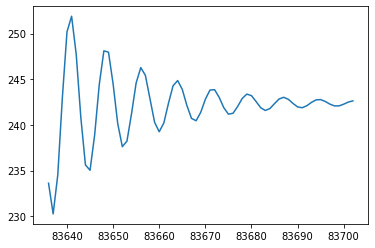

In [30]:
# 결측치 처리 형태 확인 (인덱스 번째 구간)

plt.plot(total[13], gangwha.iloc[total[13], 0])
plt.show()

In [31]:
total[13] #여기서 i번째 구간 범위 찻아서 아래에 좀 더 넓게 대입

[83636,
 83637,
 83638,
 83639,
 83640,
 83641,
 83642,
 83643,
 83644,
 83645,
 83646,
 83647,
 83648,
 83649,
 83650,
 83651,
 83652,
 83653,
 83654,
 83655,
 83656,
 83657,
 83658,
 83659,
 83660,
 83661,
 83662,
 83663,
 83664,
 83665,
 83666,
 83667,
 83668,
 83669,
 83670,
 83671,
 83672,
 83673,
 83674,
 83675,
 83676,
 83677,
 83678,
 83679,
 83680,
 83681,
 83682,
 83683,
 83684,
 83685,
 83686,
 83687,
 83688,
 83689,
 83690,
 83691,
 83692,
 83693,
 83694,
 83695,
 83696,
 83697,
 83698,
 83699,
 83700,
 83701,
 83702]

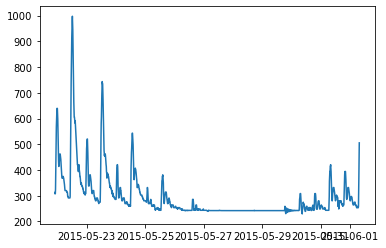

In [36]:
plt.plot(gangwha[82500:84000])

In [ ]:
gangwha.to_csv('청담대교 유량_처리완료.csv')